Step 2 notebooks are revolved around creating and assessing the latent space.

Steps performed in this notebook:

**1. Load in CCA dataframes:** Created by notebook 2-perform_cca.

The steps below are all dimension reduction techniques. They were performed on the 100 dimensions of the latent space to reduce them down to 2 for plotting.

**2. UMAP.**

**3. PCA.**

**4. TSNE.**

TSNE ended up the best option, and was continued with further to show highlighted points, and the TSNE plot for the spectral embeddings alone.

In [26]:
import os
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set plot style
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

import matplotlib.style as style
style.use('ggplot')
%matplotlib inline

## 1. Load in CCA dataframes

In [27]:
def load_pickle(fn, path):
    with open(os.path.join(path, '%s.pickle' % fn), 'rb') as f:
        df = pickle.load(f) 
    return df

# Load the CCA latent space of choice
spectral_type = 'spec2vec'
cca_type = 'cca'
latent_dims = 100

info = "- %s - %s - %s dims" % (spectral_type, cca_type, latent_dims)

df = load_pickle('dataframe_%s_%s_%d' % (spectral_type, cca_type, latent_dims), '/lustre/BIF/nobackup/unen004/data')
print("Amount of spectra: %s" % len(df))

Amount of spectra: 15145


In [28]:
# Define all plotting functions

def plot_per_class(df, title, hue='view', alpha=1, set_title=True):
    """Plot all classes seperately, coloured by view or cf_class (hue).
    """
    df_test = df[df['set'] == 'test']
    if hue == False:
        g = sns.FacetGrid(df_test, col='cf_class', col_wrap=5, height=3.5, aspect=1.2, palette='C2')
    else:
        g = sns.FacetGrid(df_test, col='cf_class', hue=hue, col_wrap=5, height=3.5, aspect=1.2)
    g.map(sns.scatterplot, 0, 1)
    if set_title:
        g.fig.suptitle(title, y=1.1, size='large', weight='semibold')
    if hue != 'cf_class':
        g.add_legend()
        
def plot_latent(df, title, hue='view'):
    """Plot train and test as jointplot
    """
    df_train = df[df['set'] == 'train']
    df_test = df[df['set'] == 'test']
    if hue == False:
        sns.jointplot(data=df_train, x=0, y=1, height=6)
        sns.jointplot(data=df_test, x=0, y=1, height=6)
    else:
        sns.jointplot(data=df_train, x=0, y=1, hue=hue, height=6)
        sns.jointplot(data=df_test, x=0, y=1, hue=hue, height=6)

In [29]:
# Prepare cca data, column for each dimension
cca_x = df['X'].apply(pd.Series)
cca_y = df['Y'].apply(pd.Series)
df_cca = pd.concat([cca_x, cca_y])
df_cca

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
spectrum_id,,,,,,,,,,,,,,,,,,,,,
CCMSLIB00000001547,-1.543295,-0.078221,0.099546,-0.801720,0.073243,2.494815,0.428506,0.983098,1.133576,-0.480181,...,-0.173337,-0.596749,0.766707,-0.181632,-1.198469,0.073527,1.628597,-0.344696,0.034838,-0.146783
CCMSLIB00000001548,0.387093,1.323455,0.232155,-1.385941,2.679320,-0.063939,-1.170831,1.551511,1.148989,-0.173499,...,-0.924859,0.966252,0.274568,1.001069,0.016652,-2.644969,-0.297691,0.898189,-0.714941,0.770391
CCMSLIB00000001550,-0.581459,1.550796,-0.356561,0.483542,-0.488145,-0.000844,0.061351,0.762905,1.077632,-0.714820,...,0.085564,-0.278996,-1.458570,-0.650132,0.265808,-0.391888,0.431999,-0.515104,0.910340,1.735697
CCMSLIB00000001552,0.395074,0.696079,0.171006,-0.002647,-0.875319,-0.762965,0.846609,0.285672,0.026587,-0.538068,...,1.261747,0.279042,0.202023,0.829906,0.238212,-2.735919,0.677138,-1.052292,2.028118,0.248923
CCMSLIB00000001554,-1.933674,-0.964248,2.732121,-0.587976,-0.281953,1.437125,0.996514,1.223447,-0.998886,-0.262141,...,-0.023311,0.160697,0.920611,0.376106,-0.282192,-0.931476,0.642278,0.072476,-0.252852,-1.045116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCMSLIB00006112262,0.587723,0.396589,-0.622257,0.652191,-0.690984,0.921708,-0.684390,0.104367,-0.224912,1.664817,...,-1.063935,1.077801,0.090729,0.031805,-0.240832,0.075101,-0.007888,0.169074,0.790020,-0.074084
CCMSLIB00006112307,-1.788903,0.672265,-0.058283,-0.449049,0.591370,-0.684220,-0.961233,1.755991,-0.858994,1.408765,...,0.829291,-0.467042,0.349009,0.272546,0.641568,-0.382225,0.913138,0.001821,-0.356855,0.259205
CCMSLIB00006112312,0.422617,1.996139,0.088640,0.556984,-0.544579,0.683149,-0.141724,0.616428,0.459772,0.185052,...,0.000317,-0.409843,0.748303,0.272981,-0.037868,-1.128474,0.017740,0.422336,0.152955,-0.411973


In [30]:
# Prepare metadata for the embeddings
df_meta = pd.DataFrame({'cf_class': np.concatenate([df['cf_class']] * 2), 
                        'set': np.concatenate([df['set']] * 2), 
                       'view': np.concatenate([np.full(len(df), 'X'), np.full(len(df), 'Y')]),
                       'spectrum_id': df_cca.index})
df_meta

,cf_class,set,view,spectrum_id
0,Peptidomimetics,train,X,CCMSLIB00000001547
1,Peptidomimetics,train,X,CCMSLIB00000001548
2,Indoles and derivatives,train,X,CCMSLIB00000001550
3,Peptidomimetics,train,X,CCMSLIB00000001552
4,Macrolactams,train,X,CCMSLIB00000001554
...,...,...,...,...
30285,"Linear 1,3-diarylpropanoids",train,Y,CCMSLIB00006112262
30286,Steroids and steroid derivatives,test,Y,CCMSLIB00006112307
30287,Flavonoids,train,Y,CCMSLIB00006112312
30288,Prenol lipids,test,Y,CCMSLIB00006112328


## 2. UMAP

In [31]:
import umap.umap_ as umap

# Init UMAP and transform
reducer = umap.UMAP()
cca_scaled = StandardScaler().fit_transform(df_cca)
umap_embedding = reducer.fit_transform(cca_scaled)

In [32]:
# Combine UMAP embedding with metadata
df_umap = pd.concat([pd.DataFrame(umap_embedding), df_meta], axis=1)
df_umap.tail()

,0,1,cf_class,set,view,spectrum_id
30285,5.534813,1.481516,"Linear 1,3-diarylpropanoids",train,Y,CCMSLIB00006112262
30286,8.081943,-3.374932,Steroids and steroid derivatives,test,Y,CCMSLIB00006112307
30287,5.909219,0.232631,Flavonoids,train,Y,CCMSLIB00006112312
30288,5.502249,-9.015843,Prenol lipids,test,Y,CCMSLIB00006112328
30289,12.495860,0.701441,Glycerolipids,train,Y,CCMSLIB00006112494


In [33]:
def filter_on_top_n_classes(this_df, num_classes=10):
    """Only keep the top n most abundant classes."""
    top_classes = this_df.cf_class.value_counts().nlargest(num_classes).index.tolist()
    this_df = this_df[this_df.cf_class.isin(top_classes)]
    this_df = this_df.reset_index(drop=True)
    return this_df

# Filter top 10 classes to simplify visualisations
df_umap_reduced = filter_on_top_n_classes(df_umap)

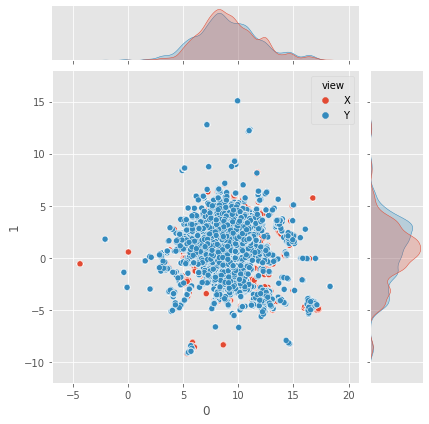

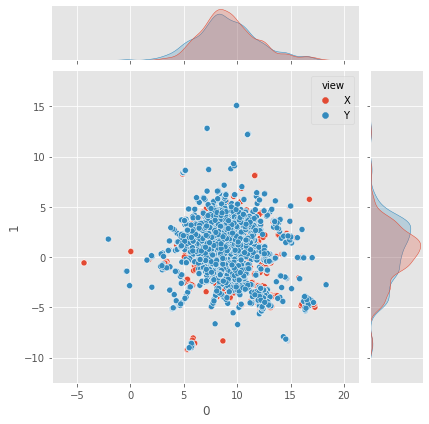

In [34]:
# Plots
plot_latent(df_umap, "UMAP %s" % info)

## 3. PCA

In [35]:
from sklearn.decomposition import PCA

# Init PCA and transform
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cca)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.0104106 0.0103443]


In [36]:
df_pca = pd.concat([pd.DataFrame(pca_result), df_meta], axis=1)
df_pca_reduced = filter_on_top_n_classes(df_pca)

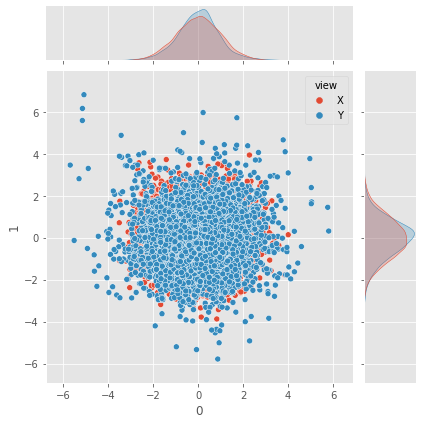

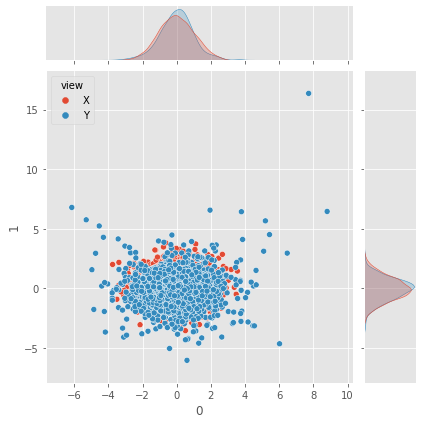

In [37]:
plot_latent(df_pca, "PCA %s" % info)

## 4. T-SNE

In [38]:
import time
from sklearn.manifold import TSNE

# Init TSNE and transform
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_cca)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/unen004/nobackup/miniconda3/envs/matchms/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/unen004/nobackup/miniconda3/envs/matchms/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 30290 samples in 0.002s...
[t-SNE] Computed neighbors for 30290 samples in 19.482s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30290
[t-SNE] Computed conditional probabilities for sample 2000 / 30290
[t-SNE] Computed conditional probabilities for sample 3000 / 30290
[t-SNE] Computed conditional probabilities for sample 4000 / 30290
[t-SNE] Computed conditional probabilities for sample 5000 / 30290
[t-SNE] Computed conditional probabilities for sample 6000 / 30290
[t-SNE] Computed conditional probabilities for sample 7000 / 30290
[t-SNE] Computed conditional probabilities for sample 8000 / 30290
[t-SNE] Computed conditional probabilities for sample 9000 / 30290
[t-SNE] Computed conditional probabilities for sample 10000 / 30290
[t-SNE] Computed conditional probabilities for sample 11000 / 30290
[t-SNE] Computed conditional probabilities for sample 12000 / 30290
[t-SNE] Computed conditional probabilities for s

In [39]:
df_tsne = pd.concat([pd.DataFrame(tsne_results), df_meta], axis=1)
df_tsne_reduced = filter_on_top_n_classes(df_tsne)

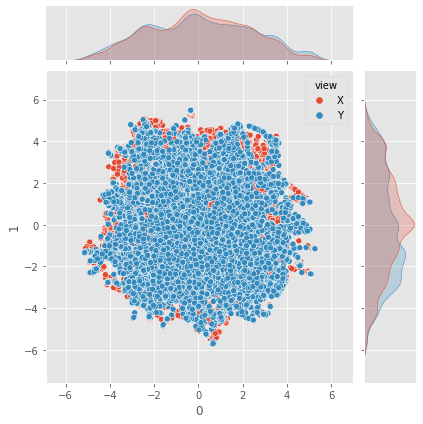

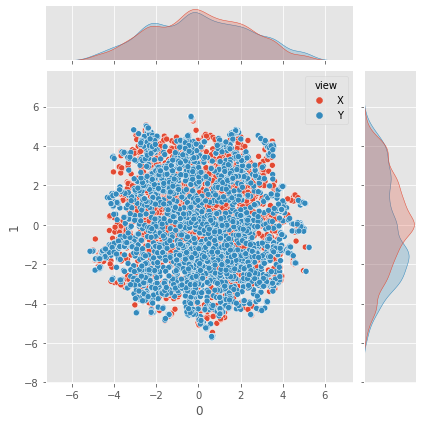

In [40]:
plot_latent(df_tsne, "TSNE %s" % info)

### 4.1 Highlight points
For presentation.

In [54]:
def plot_latent_highlight(df, query, matches, x0, x1, y0, y1):
    """Plot train and test as jointplot
    """
    df_library = df[(df['set'] == 'train') & (df['view'] == 'Y')]
    df_query = df[(df['set'] == 'train') & (df['view'] == 'X') & (df['spectrum_id'] == query)]
    #print(df_query)
    
    fig, ax = plt.subplots()
    sns.set(rc={'figure.figsize':(10,10)})
    #sns.set(font_scale=2)
    
    # plot only library (Y points)
    g = sns.scatterplot(data=df_library, x=0, y=1, ax=ax)#, height=6)
    
    if True:
        ax2 = plt.axes([1, 0.4, .4, .4])
        zoom = sns.scatterplot(data=df_library, x=0, y=1, ax=ax2)
        ax2.set_title('zoom')
        ax2.set_xlim([x0, x1])
        ax2.set_ylim([y0, y1])

        
        if True:
            # and plot the matches (10 Y points)
            cols = ['cyan', 'magenta', 'yellow']
            i=0
            for match in matches:
                df_temp = df_library[df_library['spectrum_id'] == match]
                g.scatter(df_temp.iloc[0,0], df_temp.iloc[0,1], color = cols[i])
                zoom.scatter(df_temp.iloc[0,0], df_temp.iloc[0,1], color = cols[i])
                i+=1

        # then plot query (1 X point)
        g.scatter(df_query.iloc[0,0], df_query.iloc[0,1], color = 'black')
        zoom.scatter(df_query.iloc[0,0], df_query.iloc[0,1], color = 'black')

    plt.show()

#query = 'CCMSLIB00003138871'
#matches = ['CCMSLIB00006109531', 'CCMSLIB00003137770', 'CCMSLIB00003136259']
#plot_latent_highlight(df_umap, query, matches, 10.5, 11.8, -0.6, -0.3)
#plot_latent_highlight(df_tsne, query, matches, 3.4, 3.95, 1.25, 2.5)

#query = 'CCMSLIB00005436068'
#matches = ['CCMSLIB00000086192', 'CCMSLIB00005436068', 'CCMSLIB00004694528']
#plot_latent_highlight(df_tsne, query, matches, -3.2, -2.2, -1.6, -1)

### 4.2 Spectral embedding before CCA

In [42]:
# UMAP
df_spectral = df[spectral_type].apply(pd.Series)
spectral_scaled = StandardScaler().fit_transform(df_spectral)
umap_spectral = reducer.fit_transform(spectral_scaled)
#df_umap_spectral = pd.concat([pd.DataFrame(umap_spectral, index=df.index), df['cf_class'], df['set']], axis=1)
#df_umap_spectral_reduced = filter_on_top_n_classes(df_umap_spectral)

In [43]:
#plot_latent(df_umap_spectral, "UMAP Spec2Vec", hue=False)
#plot_classes(df_umap_spectral_reduced, "UMAP Spec2Vec", "cf_class")
#plot_per_class(df_umap_spectral_reduced, "UMAP %s" % spectral_type, hue=False, set_title=False)

In [44]:
#TSNE
tsne_spectral = tsne.fit_transform(df_spectral)
df_tsne_spectral = pd.concat([pd.DataFrame(tsne_spectral, index=df.index), df['cf_class'], df['set']], axis=1)
df_tsne_spectral_reduced = filter_on_top_n_classes(df_tsne_spectral)

/home/unen004/nobackup/miniconda3/envs/matchms/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/unen004/nobackup/miniconda3/envs/matchms/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15145 samples in 0.003s...
[t-SNE] Computed neighbors for 15145 samples in 5.201s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15145
[t-SNE] Computed conditional probabilities for sample 2000 / 15145
[t-SNE] Computed conditional probabilities for sample 3000 / 15145
[t-SNE] Computed conditional probabilities for sample 4000 / 15145
[t-SNE] Computed conditional probabilities for sample 5000 / 15145
[t-SNE] Computed conditional probabilities for sample 6000 / 15145
[t-SNE] Computed conditional probabilities for sample 7000 / 15145
[t-SNE] Computed conditional probabilities for sample 8000 / 15145
[t-SNE] Computed conditional probabilities for sample 9000 / 15145
[t-SNE] Computed conditional probabilities for sample 10000 / 15145
[t-SNE] Computed conditional probabilities for sample 11000 / 15145
[t-SNE] Computed conditional probabilities for sample 12000 / 15145
[t-SNE] Computed conditional probabilities for sa

### 4.3 Structural embedding before CCA

In [45]:
# UMAP
df_structural = df['mol2vec'].apply(pd.Series)
structural_scaled = StandardScaler().fit_transform(df_structural)
umap_structural = reducer.fit_transform(structural_scaled)
#df_umap_structural = pd.concat([pd.DataFrame(umap_structural, index=df.index), df['cf_class'], df['set']], axis=1)
#df_umap_structural_reduced = filter_on_top_n_classes(df_umap_structural)

In [46]:
#plot_latent(df_umap_structural, "UMAP Mol2Vec", hue=False)
#plot_classes(df_umap_structural_reduced, "UMAP Mol2Vec", "cf_class")
#plot_per_class(df_umap_structural_reduced, "UMAP mol2vec", hue=False, set_title=False)

In [47]:
# TSNE
tsne_structural = tsne.fit_transform(df_structural)
df_tsne_structural = pd.concat([pd.DataFrame(tsne_structural, index=df.index), df['cf_class'], df['set']], axis=1)
df_tsne_structural_reduced = filter_on_top_n_classes(df_tsne_structural)

/home/unen004/nobackup/miniconda3/envs/matchms/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/unen004/nobackup/miniconda3/envs/matchms/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15145 samples in 0.003s...
[t-SNE] Computed neighbors for 15145 samples in 4.963s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15145
[t-SNE] Computed conditional probabilities for sample 2000 / 15145
[t-SNE] Computed conditional probabilities for sample 3000 / 15145
[t-SNE] Computed conditional probabilities for sample 4000 / 15145
[t-SNE] Computed conditional probabilities for sample 5000 / 15145
[t-SNE] Computed conditional probabilities for sample 6000 / 15145
[t-SNE] Computed conditional probabilities for sample 7000 / 15145
[t-SNE] Computed conditional probabilities for sample 8000 / 15145
[t-SNE] Computed conditional probabilities for sample 9000 / 15145
[t-SNE] Computed conditional probabilities for sample 10000 / 15145
[t-SNE] Computed conditional probabilities for sa

### 4.4 Plot classes
In Mol2Vec you can see the best clustering of the classes, followed by CCA Y and CCA X, and then Spec2Vec.

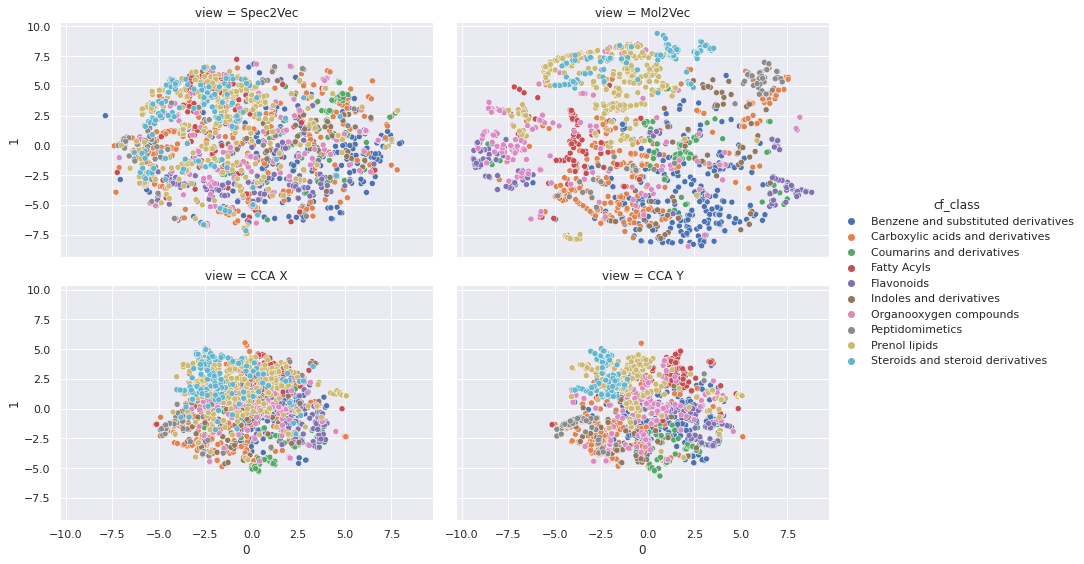

In [52]:
def plot_classes(df, set='test'):
    """Plot train and test seperately, coloured by view (X and Y)."""
    df_test = df.copy()[df['set'] == set]
    df_test.sort_values(['cf_class'], inplace=True)
    g = sns.relplot(data=df_test, x=0, y=1, col_wrap=2, col='view', hue='cf_class', height=4, aspect=1.5,
                    col_order=['Spec2Vec', 'Mol2Vec', 'CCA X', 'CCA Y'])

    
df_tsne_reduced.loc[df_tsne_reduced['view'] == 'X', 'view'] = 'CCA X'
df_tsne_reduced.loc[df_tsne_reduced['view'] == 'Y', 'view'] = 'CCA Y'
    
df_tsne_spectral_reduced['view'] = 'Spec2Vec'
df_tsne_structural_reduced['view'] = 'Mol2Vec'

df_combined = pd.concat([df_tsne_reduced, df_tsne_spectral_reduced, df_tsne_structural_reduced])
plot_classes(df_combined)

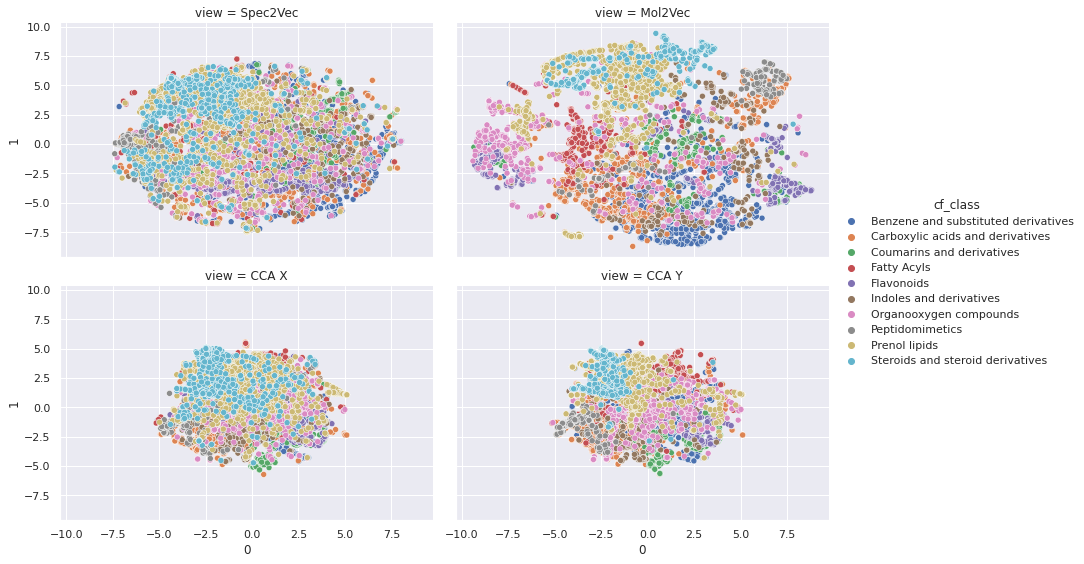

In [53]:
plot_classes(df_combined, set='train')